<a href="https://colab.research.google.com/github/makhmudov-khondamir/Machine-Learning/blob/main/%20Patient%20drug%20recommendation%20system%3A%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Patient drug recommendation system**
---
### Project Overview
Let's imagine we are a medical researcher collecting data for a study. We have collected information about patients suffering from the same disease.
 Our dataset includes information about patients who were treated with one of five different drugs, each drug showing varying effectiveness for different individuals.

**Objective:**  
Our goal is to create a model that predicts which of the five drugs may be most suitable for a new patient with the same disease. The challenge is not to find a single drug universally effective for all patients but to recommend the most appropriate drug based on the specific characteristics of each new patient.

**Approach:**

- **Multiclass Classification:** The problem is addressed using multiclass classification, where the model learns from historical data to classify the most suitable drug among multiple options.
- **Personalized Recommendation:** The model aims to provide a personalized recommendation. It identifies patterns in patient characteristics and uses this information to suggest the drug that is likely to be effective for new patients with similar profiles.

**Key Insight:**
- **Drug Effectiveness Varies:** The effectiveness of a drug can vary based on individual patient characteristics. The model does not assume that one drug is universally effective but instead recommends the drug that has been effective for similar patients in the past.

**! We use the Decision Tree algorithm to create a model**.

---
Columns:
*   Age
*   Sex
*   BP (blood pressure)
*   Cholesterol (in the blood)
*   Na_to_K (the ratio of sodium to potassium in the body)



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)
df1=df.copy()

In [15]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
91,41,M,HIGH,NORMAL,15.156,drugY
86,51,F,NORMAL,HIGH,13.597,drugX
171,45,M,LOW,NORMAL,10.017,drugX
96,58,F,LOW,HIGH,38.247,drugY
65,68,F,NORMAL,NORMAL,27.050,drugY


In [16]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['BP']=encoder.fit_transform(df['BP'])
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'])

In [19]:
x=df.drop(['Drug'], axis=1)
y=df['Drug']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=20)

## **DecisionTreeClassifier**

In [22]:
DT_model=DecisionTreeClassifier()
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
y_predict=DT_model.predict(x_test)

In [25]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



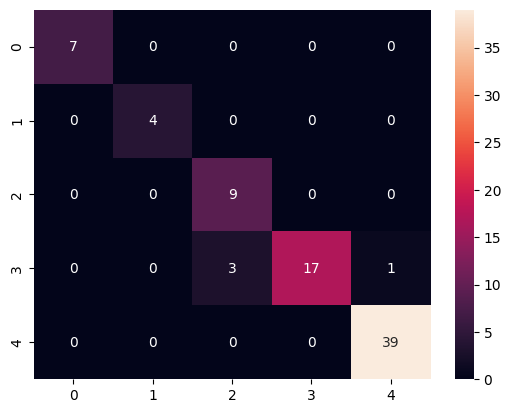

In [28]:
sns. heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [30]:
pd.unique(df['Drug'])

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

### **Cross Validation**



In [33]:
prediction=cross_val_predict(DT_model, x, y, cv=5)
print("Classification Report: \n",classification_report(y, prediction))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



### **Predicting for New Patients**

Objective: Use the trained model to recommend a drug for new patients based on their characteristics.

New Patient Data
The characteristics of the new patient are as follows:

*   Age: 45
*   Sex: Male (Encoded as 1)
*   BP (Blood Pressure): NORMAL (Encoded as 2)
*   Cholesterol: HIGH (Encoded as 0)
*   Na_to_K: 15.0


In [34]:
# New patient data
new_patient = pd.DataFrame({
    'Age': [45],
    'Sex': [1],  # Encoded value for Male
    'BP': [2],   # Encoded value for NORMAL
    'Cholesterol': [0],  # Encoded value for HIGH
    'Na_to_K': [15.0]
})

# Predict the drug for the new patient
predicted_drug = DT_model.predict(new_patient)
print(f"The recommended drug for the new patient is: {predicted_drug[0]}")


The recommended drug for the new patient is: drugY


### **Analysis**

**Recommendation:** The model suggests "drugY" as the most appropriate drug for this patient, considering their characteristics. This recommendation is based on patterns in the training data where patients with similar features responded positively to drugY.

**Reasoning:**

*   **Similarity to Training Data:** The Decision Tree Classifier has learned which
 drugs were effective for patients with specific characteristics from historical data. The patient's profile is more similar to those who had a positive response to drugY, leading the model to recommend drugY.
*   **Model’s Decision-Making:** The classifier uses the features (age, sex, blood pressure, cholesterol levels, and sodium-to-potassium ratio) to classify the new patient. The tree structure of the Decision Tree helps in identifying the most likely drug based on past data.
